# Linear Model

In this section, the entire process of creating a linear least squares regression model is demonstrated using a linear model for which basis function vector will be:

$$
    \pmb{\psi} = [1 \quad x]^T
$$

Below block of code imports required packages:

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Below block of code defines the training dataset and plots it.

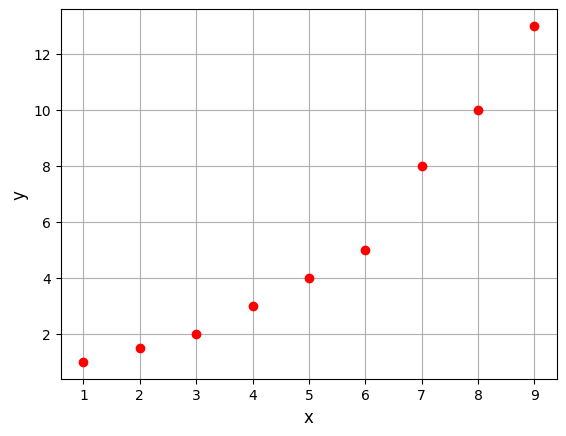

In [36]:
# Training data
xtrain = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
ytrain = np.array([1, 1.5, 2, 3, 4, 5, 8, 10, 13])

# Plotting the training data
fs = 12
fig, ax = plt.subplots()
ax.plot(xtrain, ytrain, 'ro', label='Training data')
ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel('y', fontsize=fs)
ax.grid()

Below block of code defines couple of functions: one to fit a line to given data and another to predict the output for given input. Read comments in the code for more details.

In [30]:
def fit_line(x,y):
    """
        Function to fit a straight line to the data (x,y)

        Parameters:
        ----------- 
        x : ndarray
            x-coordinate of the data points
        y : ndarray
            y-coordinate of the data points

        Returns:
        --------
        w : ndarray
            weight vector
    """
    
    num_pts = len(x)

    # Constructing the basis function matrix
    psi = np.hstack((np.ones(num_pts).reshape(-1,1), x.reshape(-1,1)))

    # Computing psuedo-inverse of psi
    psi_inv = np.linalg.pinv(psi)

    # Computing the weight vector
    w = np.dot(psi_inv, y)

    return w

def predict(x,w):
    """
        Function to predict the output for the given input x

        Parameters:
        -----------
        x : ndarray
            input data points
        w : ndarray
            weight vector

        Returns:
        --------
        y : ndarray
            predicted output
    """

    num_pts = len(x)

    # Constructing the basis function matrix
    psi = np.hstack((np.ones(num_pts).reshape(-1,1), x.reshape(-1,1)))

    # Computing the predicted output
    y = np.dot(psi, w)

    return y

Below block of code uses the function defined above to fit a line to the training data:

In [31]:
w = fit_line(xtrain, ytrain)

print("Weight vector: ", w)

Weight vector:  [-2.01388889  1.45833333]


Once the line is fitted to the training data, we can use the model to predict output at testing points.

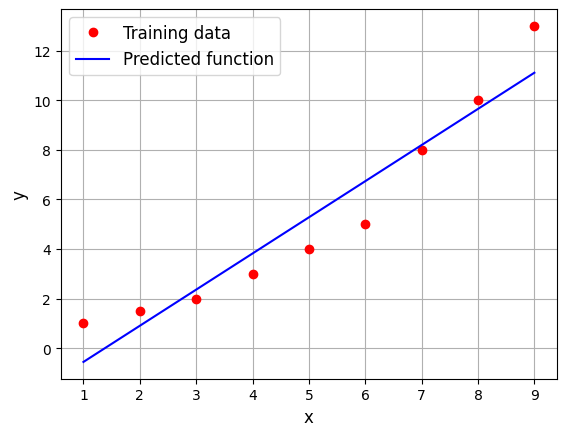

In [35]:
# Testing x
xtest = np.linspace(1, 9, 100)

# Predicting the output
ypred = predict(xtest, w)

fs = 12
fig, ax = plt.subplots()
ax.plot(xtrain, ytrain, 'ro', label='Training data')
ax.plot(xtest, ypred, 'b-', label='Predicted function')
ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel('y', fontsize=fs)
ax.grid()
ax.legend(fontsize=fs)

We are able to obtain a line that minimizes the sum of squared differences. However, the line does not fit the data well. This is because the model is too simple for the given data. We need to use more complex basis functions to create a better model.